In [90]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import cmocean as ocm
import numpy as np
import sys

sys.path.append(os.path.join(os.environ.get('srcdir')))

from features.rotate_vector_roms import rotate_vector_roms

# base case

In [177]:
# load tides and no tides hourly melting over two month
file_path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small','ocean_avg_spinUp_0009.nc')
ds = xr.open_dataset(file_path,chunks={'eta_rho':100,'xi_rho':100})
#ds['m'] = ds.m*(3600*24*365)

file_path = os.path.join(os.environ.get('prodir'),'waom10_small_grd.nc')
grd = xr.open_dataset(file_path)

In [116]:
def plot_bt(ds):
    #prepare the quiver plot showing velocity arrows
    angle = np.zeros_like(grd.lon_rho.values)
    u_rho,v_rho = rotate_vector_roms(ds.ubar.mean('ocean_time').values, ds.vbar.mean('ocean_time').values, angle)
    oo = (grd.mask_rho==1)
    u_rho[~oo]=np.nan
    v_rho[~oo]=np.nan
    bl = 2

    ds.temp.isel(s_rho=30).where((grd.mask_rho==1)).mean('ocean_time').plot(size=6,vmax=0.5,vmin=-2.5,cmap=ocm.cm.thermal)
    quiverp = plt.quiver(np.arange(0,630,bl),np.arange(0,530,bl),u_rho[::bl,::bl],v_rho[::bl,::bl],
                         pivot="mid", color='black',alpha=0.5,scale_units='xy',scale=0.01)
    #plt.quiverkey(quiverp, 0.75, 0.90, 0.1, r'$10 \frac{cm}{s}$', labelpos='E',coordinates='figure')
    plt.title('bottom temp in degC')
    plt.show()

In [117]:
def plot_bs(ds):
    #prepare the quiver plot showing velocity arrows
    angle = np.zeros_like(grd.lon_rho.values)
    u_rho,v_rho = rotate_vector_roms(ds.ubar.mean('ocean_time').values, ds.vbar.mean('ocean_time').values, angle)
    oo = (grd.mask_rho==1)
    u_rho[~oo]=np.nan
    v_rho[~oo]=np.nan
    bl = 2

    ds.salt.isel(s_rho=0).where((grd.mask_rho==1)).mean('ocean_time').plot(size=6,vmax=0.5,vmin=-2.5,cmap=ocm.cm.thermal)
    quiverp = plt.quiver(np.arange(0,630,bl),np.arange(0,530,bl),u_rho[::bl,::bl],v_rho[::bl,::bl],
                         pivot="mid", color='black',alpha=0.5,scale_units='xy',scale=0.01)
    #plt.quiverkey(quiverp, 0.75, 0.90, 0.1, r'$10 \frac{cm}{s}$', labelpos='E',coordinates='figure')
    plt.title('bottom temp in degC')
    plt.show()

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


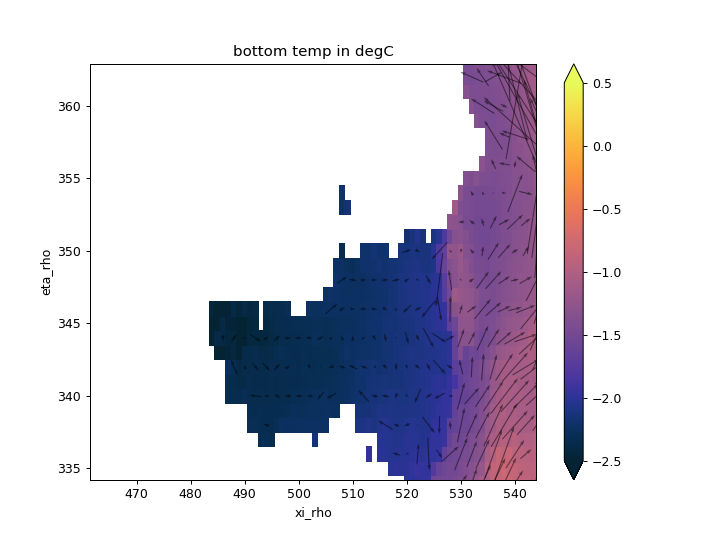

In [27]:
%matplotlib notebook
plot_bt(ds)

In [15]:
# load tides and no tides hourly melting over two month
file_path = os.path.join(os.environ.get('rawdir'),'waom10_wb','ocean_avg_0011.nc')
ds_his = xr.open_dataset(file_path)
#ds['m'] = ds.m*(3600*24*365)

<IPython.core.display.Javascript object>


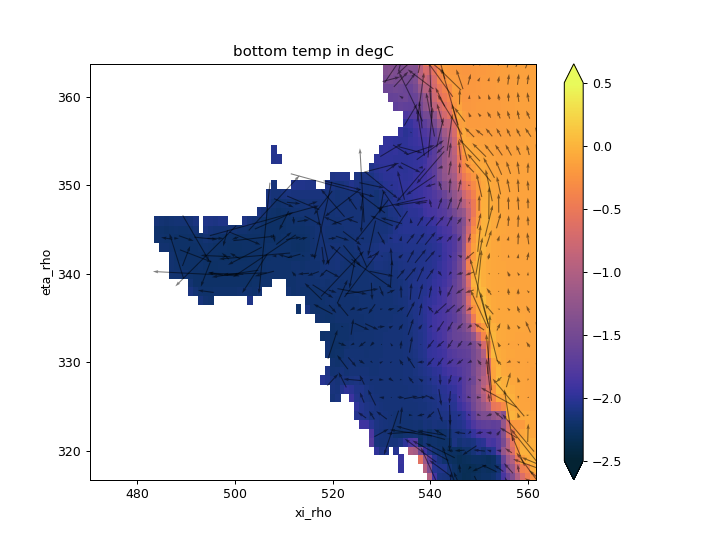

In [30]:
#prepare the quiver plot showing velocity arrows
angle = np.zeros_like(grd.lon_rho.values)
u,v = rotate_vector_roms(ds_his.u.isel(s_rho=0)[0].values, ds_his.v.isel(s_rho=0)[0].values, angle)
oo = (grd.mask_rho==1)
u[~oo]=np.nan
v[~oo]=np.nan
bl = 2

speed = np.sqrt(np.square(u)+np.square(v))
ds.temp.isel(s_rho=0,ocean_time=0).where((grd.mask_rho==1)).plot(size=6,vmax=0.5,vmin=-2.5,cmap=ocm.cm.thermal)
#plt.close()
#plt.figure(figsize=(10,8))
#plt.pcolormesh(speed,cmap=ocm.cm.speed,vmin=0,vmax=0.1)
#plt.colorbar()
quiverp = plt.quiver(np.arange(0,630,bl),np.arange(0,530,bl),u[::bl,::bl],v[::bl,::bl],
                     pivot="mid", color='black',alpha=0.5,scale_units='xy',scale=0.01)
#plt.quiverkey(quiverp, 0.75, 0.90, 0.1, r'$10 \frac{cm}{s}$', labelpos='E',coordinates='figure')
plt.title('bottom temp in degC')
plt.show()

In [18]:
file_path = os.path.join(os.environ.get('rawdir'),'ROMSIceShelf','Data','amery','ais_sbc.nc')
ais_sbc = xr.open_dataset(file_path)
file_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_v2.0_frc','waom10_small_sbc.nc')
waom_sbc = xr.open_dataset(file_path)

<IPython.core.display.Javascript object>


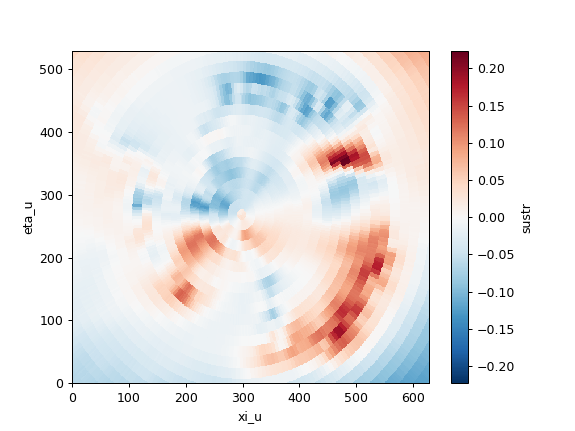

In [32]:
plt.close()
waom_sbc.sustr.mean('sms_time').plot()
plt.show()

<IPython.core.display.Javascript object>


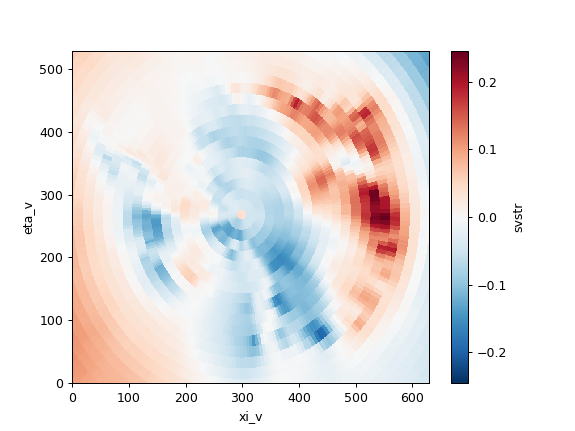

In [31]:
plt.close()
waom_sbc.svstr.mean('sms_time').plot()
plt.show()

# Tcine 20 -> 250

In [114]:
def plot_bm_diff(ds,ds_ref):
    (ds.m.where((grd.zice < 0.0)&(grd.mask_rho==1)).mean('ocean_time')\
     - ds_ref.m.where((grd.zice < 0.0)&(grd.mask_rho==1)).mean('ocean_time')).plot(cmap=plt.cm.bwr,size=10,vmax=1,vmin=-1)
    plt.title('annual mean basal melt rate in [m/a]',fontsize=24)
    plt.axis('off')
    plt.show()

In [115]:
def plot_bm(ds):   
    ds.m.where((grd.zice < 0.0)&(grd.mask_rho==1)).mean('ocean_time').plot(cmap=plt.cm.bwr,size=10,vmax=3,vmin=-3)
    plt.title('annual mean basal melt rate in [m/a]',fontsize=24)
    plt.axis('off')
    plt.show()

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


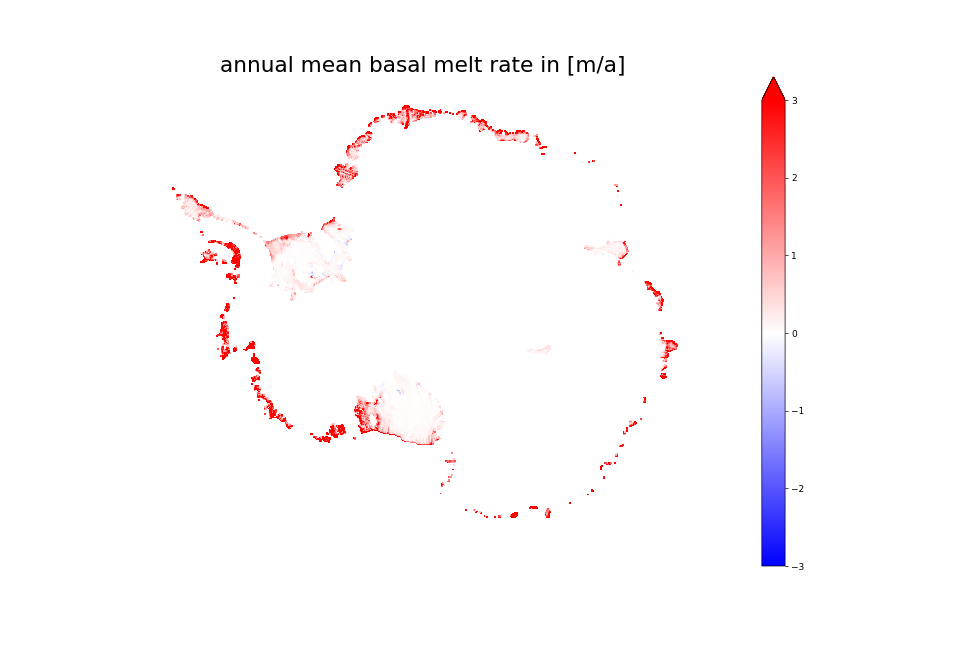

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


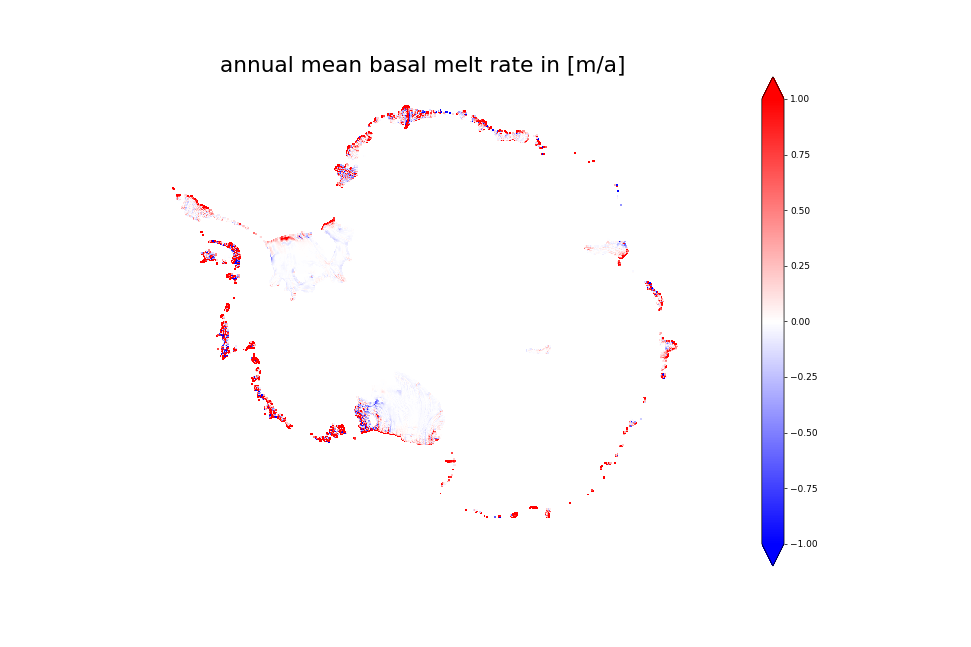

In [86]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_Tcline','ocean_avg_spinUp_0009.nc')
ds_Tcline = xr.open_dataset(file_path,chunks={'eta_rho':100,'xi_rho':100})
ds_Tcline['m'] = ds_Tcline.m*(3600*24*365)
plot_bm(ds_Tcline)
plot_bm_diff(ds_Tcline,ds)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


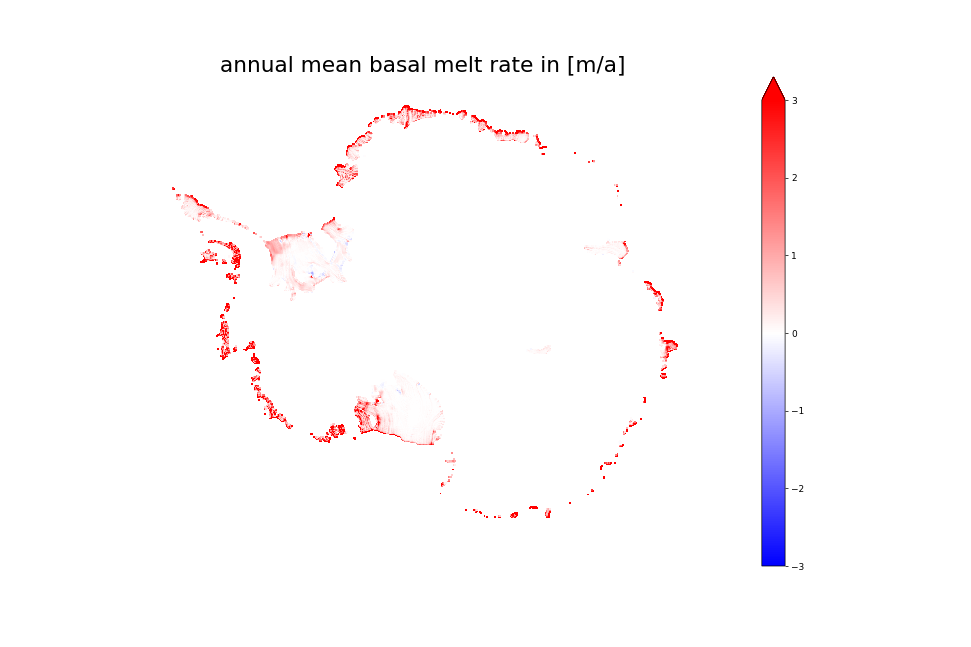

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


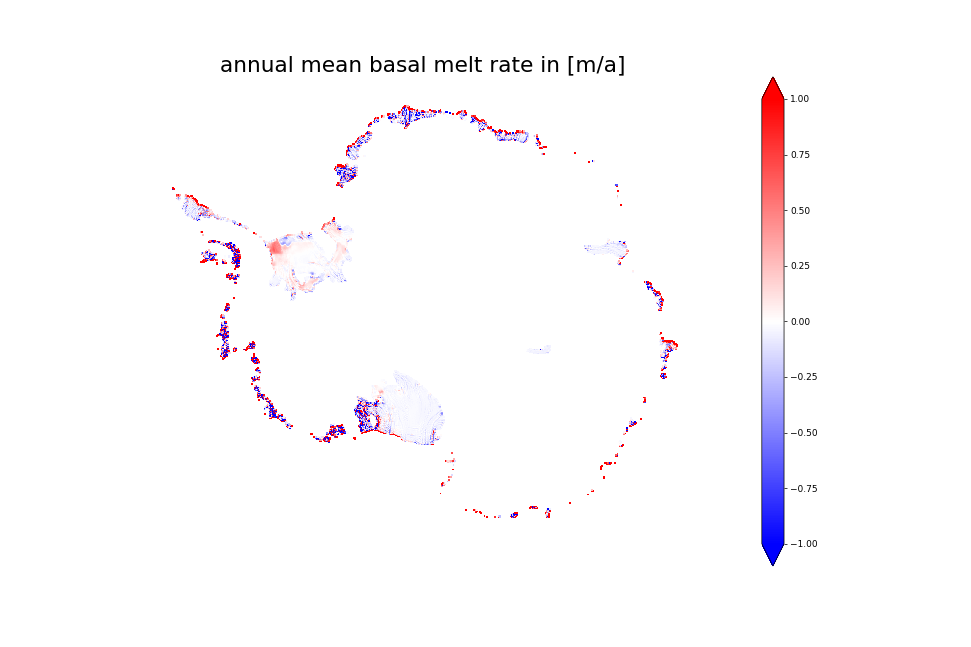

In [87]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_MY2.5','ocean_avg_spinUp_0009.nc')
ds_MY = xr.open_dataset(file_path,chunks={'eta_rho':100,'xi_rho':100})
ds_MY['m'] = ds_MY.m*(3600*24*365)
plot_bm(ds_MY)
plot_bm_diff(ds_MY,ds)

In [172]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small','ocean_avg_spinUp_0010.nc')
ds = xr.open_dataset(file_path,chunks={'eta_rho':100,'xi_rho':100}).isel(ocean_time=range(0,9))
ds['m'] = ds.m*(3600*24*365)
file_path = os.path.join(os.environ.get('rawdir'),'waom10_h_smooth','ocean_avg_spinUp_0004.nc')
ds_diff = xr.open_dataset(file_path,chunks={'eta_rho':100,'xi_rho':100})
ds_diff['m'] = ds_diff.m*(3600*24*365)
plot_bm(ds_diff)
plot_bm_diff(ds_diff,ds)

IndexError: index 4 is out of bounds for axis 1 with size 4

In [11]:
ds_diff

<xarray.Dataset>
Dimensions:        (boundary: 4, eta_psi: 529, eta_rho: 530, eta_u: 530, eta_v: 529, ocean_time: 12, s_rho: 31, s_w: 32, tracer: 2, xi_psi: 629, xi_rho: 630, xi_u: 629, xi_v: 630)
Coordinates:
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 -0.8871 -0.8548 ...
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 -0.9032 -0.871 -0.8387 ...
    x_rho          (eta_rho, xi_rho) float64 dask.array<shape=(530, 630), chunksize=(100, 100)>
    y_rho          (eta_rho, xi_rho) float64 dask.array<shape=(530, 630), chunksize=(100, 100)>
    x_u            (eta_u, xi_u) float64 dask.array<shape=(530, 629), chunksize=(530, 629)>
    y_u            (eta_u, xi_u) float64 dask.array<shape=(530, 629), chunksize=(530, 629)>
    x_v            (eta_v, xi_v) float64 dask.array<shape=(529, 630), chunksize=(529, 630)>
    y_v            (eta_v, xi_v) float64 dask.array<shape=(529, 630), chunksize=(529, 630)>
    x_psi          (eta_psi, xi_psi) float64 dask.array<shape=(529, 62

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


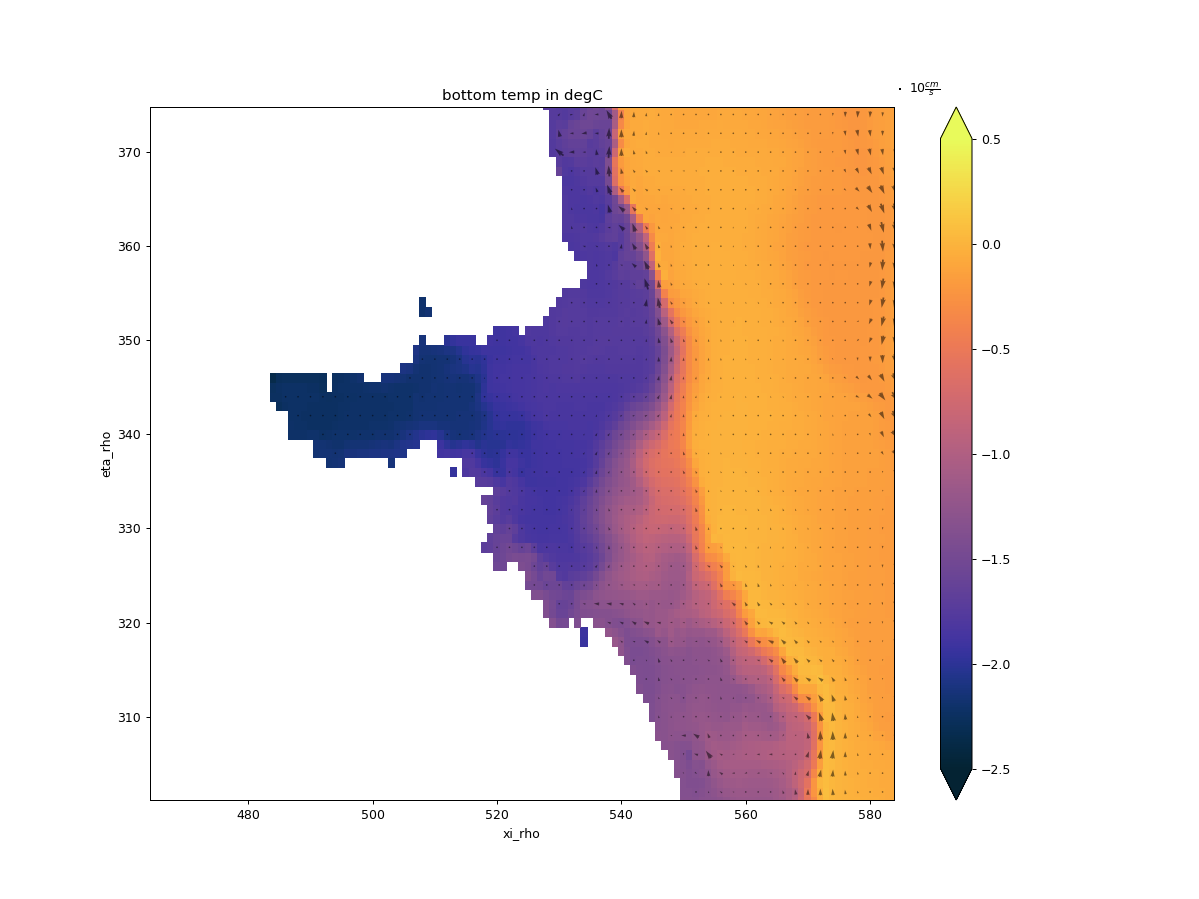

In [14]:
%matplotlib notebook
plt.close()
#prepare the quiver plot showing velocity arrows
angle = np.zeros_like(grd.lon_rho.values)
u_rho,v_rho = rotate_vector_roms(ds_diff.ubar.isel(ocean_time=0).values, ds_diff.vbar.isel(ocean_time=0).values, angle)
oo = (grd.mask_rho==1)
u_rho[~oo]=np.nan
v_rho[~oo]=np.nan
bl = 2

#speed = np.sqrt(np.square(u_rho)*np.square(v_rho))
ds_diff.temp.isel(s_rho=0).where((grd.mask_rho==1)).mean('ocean_time').plot(size=10,vmax=0.5,vmin=-2.5,cmap=ocm.cm.thermal)
#plt.figure(figsize=(15,10))
#plt.pcolormesh(speed,vmin=0,vmax=0.1,cmap=ocm.cm.speed)
#plt.colorbar()

quiverp = plt.quiver(np.arange(0,630,bl),np.arange(0,530,bl),u_rho[::bl,::bl],v_rho[::bl,::bl],
                     pivot="mid", color='black',alpha=0.5,scale_units='xy',scale=0.1)
plt.quiverkey(quiverp, 0.75, 0.90, 0.1, r'$10 \frac{cm}{s}$', labelpos='E',coordinates='figure')
plt.title('bottom temp in degC')
plt.show()

In [70]:
ini_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_v2.0_frc','waom10_small_ini.nc')
ini = xr.open_dataset(ini_path).isel(two=0)

In [71]:
for lev in range(ini.s_rho.size):
    temps = ini.temp[0,lev].values.copy()
    mask = (grd.zice<0.0).values
    temps[mask]+=1
    ini.temp[0,lev] = temps.copy()

In [45]:
ini.temp

<xarray.DataArray 'temp' (ocean_time: 1, s_rho: 31, eta_rho: 530, xi_rho: 630)>
[10350900 values with dtype=float64]
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-01
  * s_rho       (s_rho) float64 -0.9839 -0.9516 -0.9194 -0.8871 -0.8548 ...
    x_rho       (eta_rho, xi_rho) float64 ...
    y_rho       (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  potential temperature
    units:      Celsius
    time:       ocean_time
    field:      temperature, scalar, series

<IPython.core.display.Javascript object>


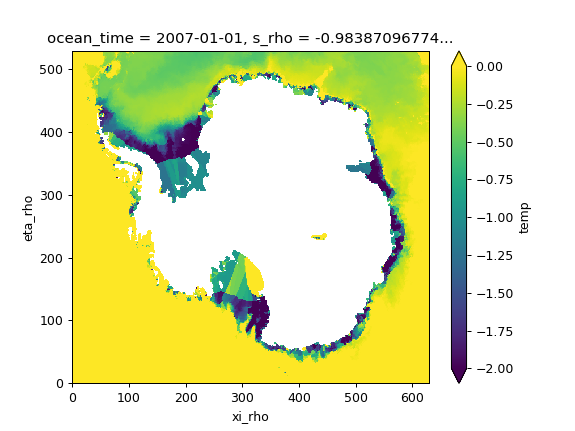

In [72]:
plt.close()
ini.temp[0,0].plot(vmin=-2,vmax=0)
plt.show()

In [73]:
out_path = os.path.join(ini_path,os.pardir,'waom10_small_ini_hot.nc')
ini.to_netcdf(out_path)

In [74]:
def plot_cavity(rds,grd,grid_coord,max_depth=None,tmin=-3,tmax=1,smin=33.8,smax=34.8,mean=True):            

    print('define slice')
    [xi_min,eta_min,xi_max,eta_max,loc] = grid_coord

    plt.close()

    grd_tr = grd.isel(eta_rho=slice(eta_min,eta_max+1),xi_rho=slice(xi_min,xi_max+1))
    rds_tr = rds.isel(eta_rho=slice(eta_min,eta_max+1),xi_rho=slice(xi_min,xi_max+1))
    
    x = grd_tr.lat_rho.values.squeeze()
    y = rds_tr.depth[0].values.squeeze()
    
    y[np.isnan(y)]=0.0
    
    if mean == True:
        
        fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10))
        
        print('calculate mean')
        temp_val = rds_tr.temp.mean('ocean_time').to_masked_array().squeeze()
        salt_val = rds_tr.salt.mean('ocean_time').to_masked_array().squeeze()

        print('plot')
        temp_plt = ax1.pcolormesh(x,y,temp_val,vmin=tmin,vmax=tmax,cmap=ocm.thermal)
        plt.colorbar(temp_plt,ax=ax1,label='deg C')
        ax1.set_title('Temperature')
        ax1.set_ylabel('depth')

        salt_plt = ax2.pcolormesh(x,y,salt_val,vmin=smin,vmax=smax,cmap =ocm.haline)
        plt.colorbar(salt_plt,ax=ax2,label='PSU')
        ax2.set_title('Salinity')
        ax2.set_xlabel('latitude')
        ax2.set_ylabel('depth')

        if max_depth != None:
            for ax in [ax1,ax2]:
                ax.set_ylim([-max_depth,0])
        
        plt.show()
        
    elif mean == False:
        
        print('set up widget')
        def widget(month):
            
            fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10))

            temp_val = rds_tr.temp.to_masked_array().squeeze()
            salt_val = rds_tr.salt.to_masked_array().squeeze()

            temp_plt = ax1.pcolormesh(x,y,temp_val[month],vmin=tmin,vmax=tmax,cmap=ocm.thermal)
            plt.colorbar(temp_plt,ax=ax1,label='deg C')
            ax1.set_title('Temperature')
            ax1.set_ylabel('depth')

            salt_plt = ax2.pcolormesh(x,y,salt_val[month],vmin=smin,vmax=smax,cmap =ocm.haline)
            plt.colorbar(salt_plt,ax=ax2,label='PSU')
            ax2.set_title('Salinity')
            ax2.set_xlabel('latitude')
            ax2.set_ylabel('depth')
            
            if max_depth != None:
                for ax in [ax1,ax2]:
                    ax.set_ylim([-max_depth,0])
            
            plt.show()
            
        interact(widget,month=(0,11))

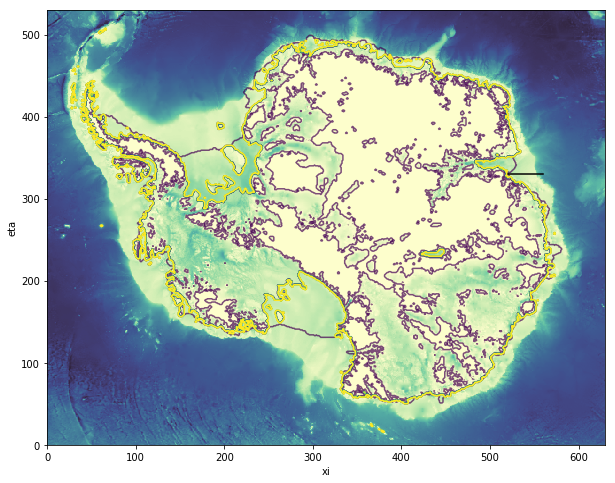

In [169]:
### defining the transsects and plotting them on top of bathy and ice front
%matplotlib inline
plt.close()
fig = plt.figure(figsize=(10,8))
plt.pcolormesh(ds.h,cmap=ocm.deep)
plt.contour(grd.zice,[-0.01],alpha=0.7)
plt.contour(grd.mask_rho)
plt.xlabel('xi')
plt.ylabel('eta')
#linescodeline = [xi_min,eta_min,xi_max,eta_max]
#amery=[650,447,660,447,"amery"]
amery=[520,330,560,330,"amery"]
#ross=[450,225,450,240,"ross"]
#weddell=[320,455,320,470,"weddel"]
#bellinghausen=[215,433,225,433,"bellinghausen"]


plt.plot((amery[0],amery[2]),(amery[1],amery[3]),"k-")

#plt.xlim((100,750))
#plt.ylim((100,650))
plt.show()

In [97]:
from features.calc_z import calc_z
from ipywidgets import interact
import cmocean.cm as ocm

def make_4D_depth(ds,grd):
    
    depths = np.empty((ds.ocean_time.size,ds.s_rho.size,ds.eta_rho.size,ds.xi_rho.size))
    
    for tstep in np.arange(ds.ocean_time.size):

        h = grd.h.values
        zice = grd.zice.values
        theta_s = ds.theta_s.values
        theta_b = ds.theta_b.values
        hc = ds.hc.values
        N = ds.s_rho.size
        zeta = ds.zeta[tstep].values
        Vstretching = ds.Vstretching.values
        
        depths[tstep],s,C = calc_z(h,zice,theta_s,theta_b,hc,N,zeta,Vstretching)
        
    ds = ds.assign_coords(depth = xr.DataArray(depths,dims=['ocean_time','s_rho','eta_rho','xi_rho']))
    
    #ds['depth'] = ds.depth.where(ds.mask_rho == 1)
    
    return ds


In [178]:
ds = make_4D_depth(ds,grd)

In [182]:
%matplotlib inline
plot_cavity(ds,grd,amery,tmin=-2.0,tmax=0.0,smin=34.0,smax=34.5,mean=False,max_depth=800)

define slice
set up widget


interactive(children=(IntSlider(value=5, description='month', max=11), Output()), _dom_classes=('widget-interact',))

In [125]:
path = os.path.join(os.environ.get('rawdir'),'waom10_hot','ocean_his.nc')
hot = xr.open_dataset(path)
s2a = 3600*24*365

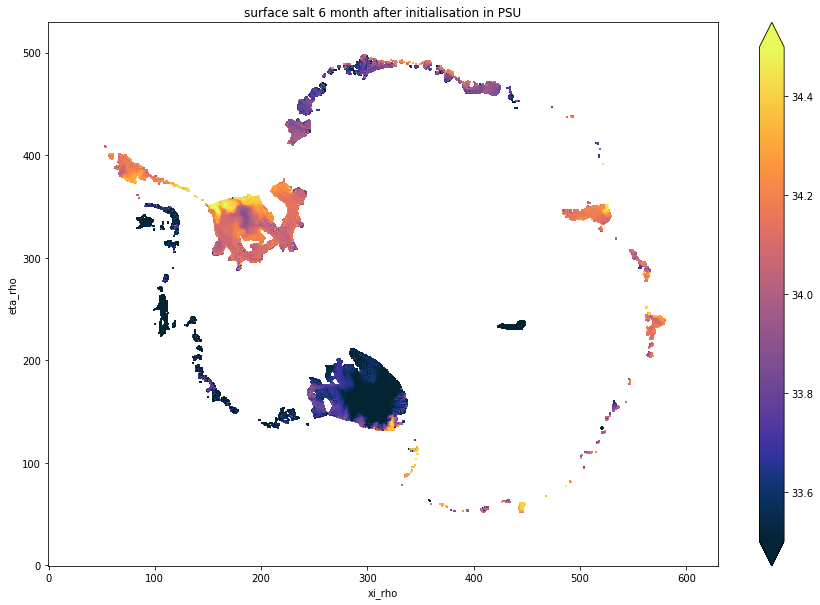

In [214]:
plt.close()
(hot.salt[1,30]).where((grd.zice < 0.0)&(grd.mask_rho==1)).plot(size=10,cmap=ocm.thermal,vmax=34.5,vmin=33.5)
plt.title('surface salt 6 month after initialisation in PSU')
plt.show()

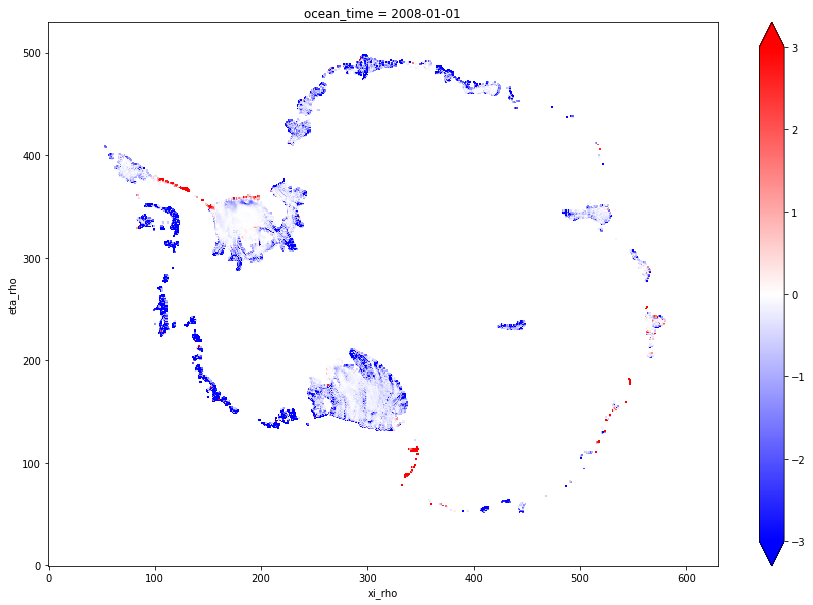

In [167]:
plt.close()
(hot.m[2]*s2a).where((grd.zice < 0.0)&(grd.mask_rho==1)).plot(size=10,vmin=-3,vmax=3,cmap=plt.cm.bwr)
plt.show()

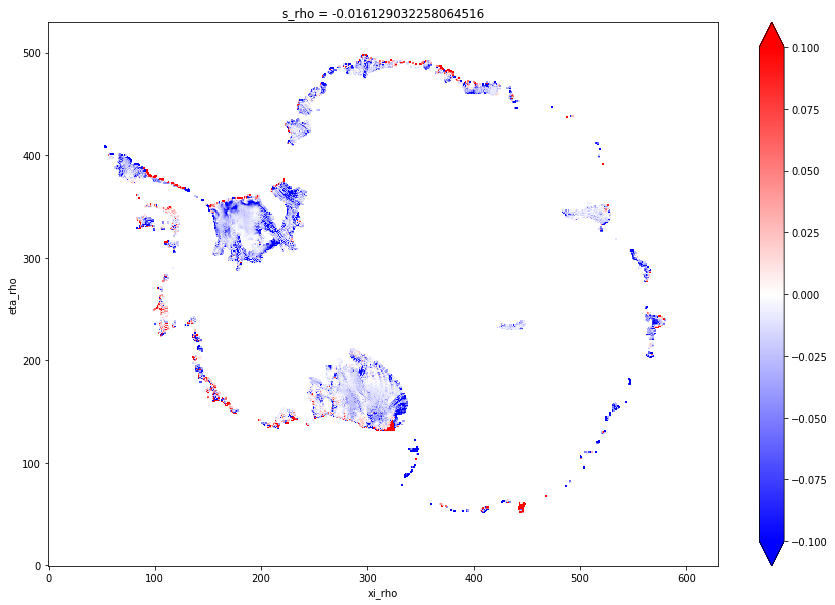

In [162]:
%matplotlib inline
(hot.temp[2,30]-hot.temp[1,30]).where((grd.zice < 0.0)&(grd.mask_rho==1)).plot(size=10,cmap=plt.cm.bwr,vmin=-0.1,vmax=0.1)
plt.show()